## Import necessary libraries

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    fbeta_score)

In [72]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Training & Prediction

In [73]:
X = data.drop(columns='target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## Plotting the confusion Matrix

In [74]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[156,   0],
       [  3, 149]], dtype=int64)

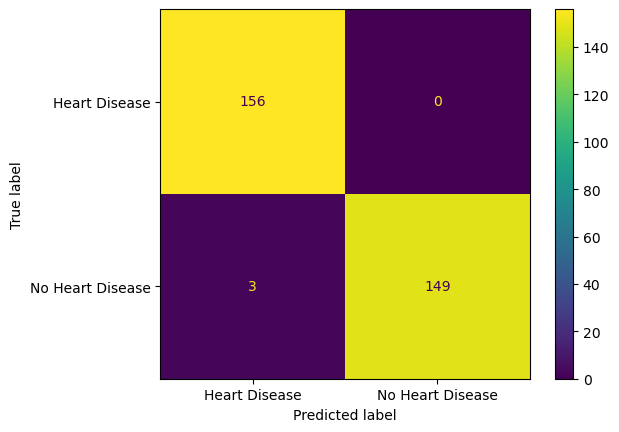

In [75]:
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Heart Disease", "No Heart Disease"]).plot()

In [89]:
print("Precision: ", precision_score(y_test, y_pred))
print("Recall:    ", recall_score(y_test, y_pred))
print("F1 Score:  ", f1_score(y_test, y_pred))
print("F0.5 Score:", fbeta_score(y_test, y_pred,beta=0.5))
print("F2 Score:  ",fbeta_score(y_test, y_pred,beta=2))

Precision:  1.0
Recall:     0.9802631578947368
F1 Score:   0.9900332225913622
F0.5 Score: 0.9959893048128343
F2 Score:   0.9841479524438572


In [77]:
print(classification_report(y_test,y_pred,target_names=["Heart Disease", "No Heart Disease"] ))

                  precision    recall  f1-score   support

   Heart Disease       0.98      1.00      0.99       156
No Heart Disease       1.00      0.98      0.99       152

        accuracy                           0.99       308
       macro avg       0.99      0.99      0.99       308
    weighted avg       0.99      0.99      0.99       308

